In [7]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
from src import utils
from src.preprocessing import preprocess_data

import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

pd.set_option("display.max_columns", None)
config = utils.get_config()

In [2]:
df = pd.read_csv(config["raw_data"]["path"])
df = preprocess_data(data=df, config=config)
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
id,,,,,,,,,,,,
0,21,1,35.0,0,65101.0,124.0,187,1.0,0.0,0.0,1.0,0
1,43,1,28.0,0,58911.0,26.0,288,1.0,0.0,1.0,1.0,1
2,25,1,14.0,1,38043.0,152.0,254,0.0,1.0,0.0,0.0,0
3,35,1,1.0,0,2630.0,156.0,76,0.0,0.0,0.0,1.0,0
4,36,1,15.0,1,31951.0,152.0,294,0.0,0.0,0.0,0.0,0


In [3]:
utils.initial_check(df)

,Column,Type,Null Count,Unique Count,Min,Max
0,Age,int64,0,66,20.0,85.0
1,Driving_License,int64,0,2,0.0,1.0
2,Region_Code,float64,0,54,0.0,52.0
3,Previously_Insured,int64,0,2,0.0,1.0
4,Annual_Premium,float64,0,51728,2630.0,540165.0
5,Policy_Sales_Channel,float64,0,152,1.0,163.0
6,Vintage,int64,0,290,10.0,299.0
7,Gender_Male,float64,0,2,0.0,1.0
8,Vehicle_Age_< 1 Year,float64,0,2,0.0,1.0
9,Vehicle_Age_> 2 Years,float64,0,2,0.0,1.0


<Axes: >

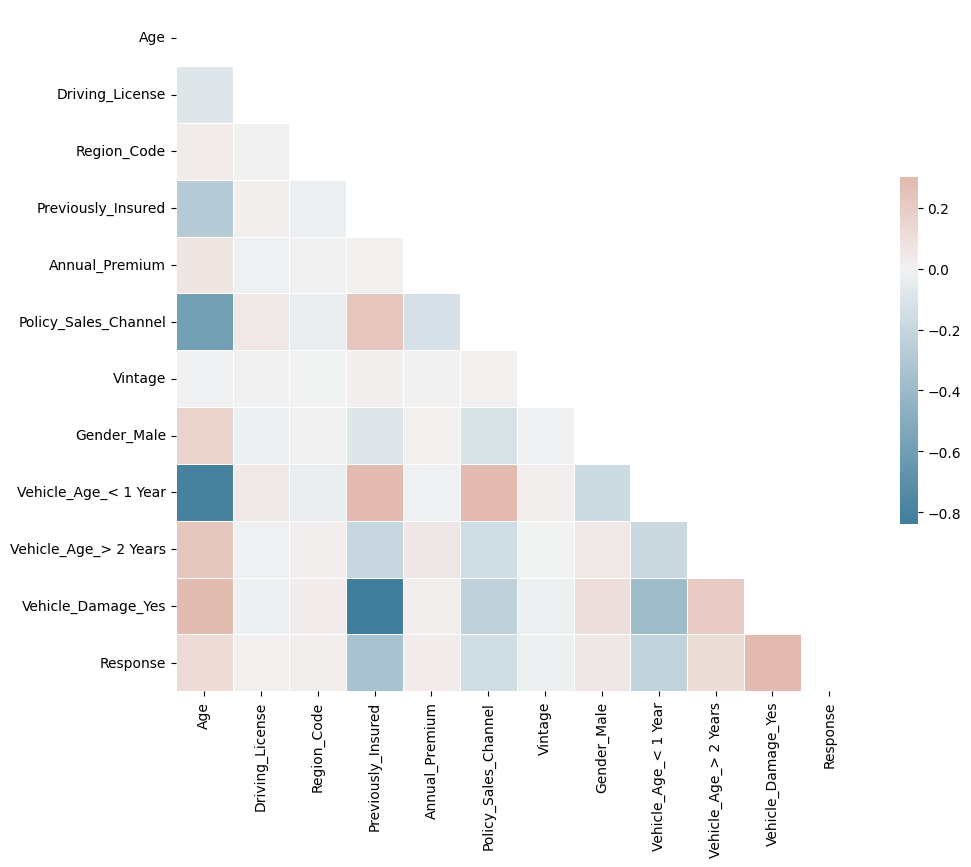

In [6]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})